Q1: Import and store the data in a data frame
Data Set - http://www.stat.ufl.edu/~winner/data/airq402.dat
Data Description - http://www.stat.ufl.edu/~winner/data/airq402.txt

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics


In [2]:
cols=np.array(["City1","City2","Average_Fare","Distance","Avg_Wkly_Passengers","Lead_Airline","Market_Share","Avg_Fare","LowPriceAirline","MarketShare","price"])
cols

array(['City1', 'City2', 'Average_Fare', 'Distance',
       'Avg_Wkly_Passengers', 'Lead_Airline', 'Market_Share', 'Avg_Fare',
       'LowPriceAirline', 'MarketShare', 'price'], dtype='<U19')

In [3]:
df=pd.read_fwf("http://www.stat.ufl.edu/~winner/data/airq402.dat",header=None,names=cols)
df=df.sort_values(by=["Average_Fare"])

In [4]:
print(df.dtypes)

City1                   object
City2                   object
Average_Fare           float64
Distance                 int64
Avg_Wkly_Passengers    float64
Lead_Airline            object
Market_Share           float64
Avg_Fare               float64
LowPriceAirline         object
MarketShare            float64
price                  float64
dtype: object


In [5]:
print(df.describe().transpose())

                      count        mean         std     min       25%  \
Average_Fare         1000.0   163.37542   55.365470   50.52  125.9750   
Distance             1000.0  1056.97300  643.203251  108.00  553.5000   
Avg_Wkly_Passengers  1000.0   672.27914  766.519254  181.41  257.1975   
Market_Share         1000.0    60.12859   19.367779   17.68   46.5100   
Avg_Fare             1000.0   166.64756   62.660140   50.52  124.0850   
MarketShare          1000.0    34.55148   27.096999    1.06   13.1950   
price                1000.0   143.19309   47.229184   49.61  113.7675   

                         50%        75%      max  
Average_Fare         161.345   197.3925   401.23  
Distance             919.000  1452.5000  2724.00  
Avg_Wkly_Passengers  404.780   769.9125  8950.76  
Market_Share          59.240    73.5100   100.00  
Avg_Fare             161.400   202.9775   490.03  
MarketShare           26.140    52.9725   100.00  
price                137.825   168.5300   387.94  


In [6]:
Q3=df.quantile(.75)
Q1=df.quantile(.25)
IQR=Q3-Q1

print("IQR=",IQR)

df_out=df[~((df< (Q1 - 1.5 * IQR)) |(df> (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_out.shape)

IQR= Average_Fare            71.4175
Distance               899.0000
Avg_Wkly_Passengers    512.7150
Market_Share            27.0000
Avg_Fare                78.8925
MarketShare             39.7775
price                   54.7625
dtype: float64
(885, 11)


In [7]:
df.corr()

,Average_Fare,Distance,Avg_Wkly_Passengers,Market_Share,Avg_Fare,MarketShare,price
Average_Fare,1.000000,0.587169,-0.126175,-0.234142,0.981462,-0.458660,0.866410
Distance,0.587169,1.000000,-0.090131,-0.531406,0.564082,-0.367831,0.583239
Avg_Wkly_Passengers,-0.126175,-0.090131,1.000000,-0.067605,-0.100946,0.034241,-0.142314
Market_Share,-0.234142,-0.531406,-0.067605,1.000000,-0.220801,0.306832,-0.307672
Avg_Fare,0.981462,0.564082,-0.100946,-0.220801,1.000000,-0.472838,0.826511
MarketShare,-0.458660,-0.367831,0.034241,0.306832,-0.472838,1.000000,-0.240186
price,0.866410,0.583239,-0.142314,-0.307672,0.826511,-0.240186,1.000000


In [8]:
df_X=df_out
df_X=df_X.drop(["Average_Fare"], axis=1)
df_X.head()


,City1,City2,Distance,Avg_Wkly_Passengers,Lead_Airline,Market_Share,Avg_Fare,LowPriceAirline,MarketShare,price
660,LAS,LGB,231,592.71,B6,100.00,50.52,B6,100.00,50.52
704,ISP,PVD,108,262.71,WN,100.00,52.99,WN,100.00,52.99
674,LAS,ONT,197,1225.43,WN,97.88,58.13,WN,97.88,58.13
699,LGB,OAK,353,1255.32,B6,100.00,61.02,B6,100.00,61.02
121,BWI,BUF,281,671.19,WN,94.94,67.82,WN,94.94,67.82


In [9]:
Y=df_out.iloc[:,[2]]
print(Y,df_X.head())

     Average_Fare
660         50.52
704         52.99
674         58.45
699         61.02
121         68.57
948         69.03
3           69.40
509         69.84
855         69.99
740         70.10
690         70.48
991         70.61
651         71.12
867         71.27
697         71.48
870         71.56
22          71.57
145         71.81
137         72.03
181         72.50
998         73.57
935         73.70
232         73.73
140         74.08
131         74.41
694         74.55
980         74.62
28          74.82
964         75.34
517         75.44
..            ...
83         250.88
329        251.16
74         252.66
185        252.85
501        253.52
746        253.85
426        254.29
211        254.38
832        254.96
897        255.28
613        255.50
923        255.73
253        257.32
216        258.68
54         259.76
485        262.81
899        264.85
88         265.27
160        266.31
708        268.96
407        269.76
201        270.65
443        270.89
588       

In [10]:
df_X.corr

<bound method DataFrame.corr of     City1 City2  Distance  Avg_Wkly_Passengers Lead_Airline  Market_Share  \
660   LAS   LGB       231               592.71           B6        100.00   
704   ISP   PVD       108               262.71           WN        100.00   
674   LAS   ONT       197              1225.43           WN         97.88   
699   LGB   OAK       353              1255.32           B6        100.00   
121   BWI   BUF       281               671.19           WN         94.94   
948   RNO   SJC       188               418.47           WN         99.68   
3     ALB   BWI       288               606.84           WN         96.97   
509   ELP   PHX       347               479.45           WN         74.63   
855   OAK   RNO       180               378.04           WN        100.00   
740   SDF   STL       254               193.26           WN         63.94   
690   LAS   SNA       226              1167.06           HP         72.32   
991   SEA   GEG       224              1423.

In [11]:
cols=df.corr()<0.1
df_X_out=df_X.drop(["MarketShare"],axis=1)
df_X_out=df_X.drop(["Market_Share"],axis=1)
df_X_out=df_X.drop(["Avg_Wkly_Passengers"],axis=1)
df_X_out.head()
#df_X_out to be treated as the X variable

,City1,City2,Distance,Lead_Airline,Market_Share,Avg_Fare,LowPriceAirline,MarketShare,price
660,LAS,LGB,231,B6,100.00,50.52,B6,100.00,50.52
704,ISP,PVD,108,WN,100.00,52.99,WN,100.00,52.99
674,LAS,ONT,197,WN,97.88,58.13,WN,97.88,58.13
699,LGB,OAK,353,B6,100.00,61.02,B6,100.00,61.02
121,BWI,BUF,281,WN,94.94,67.82,WN,94.94,67.82


In [12]:
#Change the categorical variables 
from sklearn.preprocessing import LabelEncoder

#reading categorical varaibles
df_X_out.dtypes
colsNew=df_X_out.dtypes==object
cat_cols=colsNew.index[colsNew==True]
cat_cols
#Transforming the categorical var
enc = LabelEncoder()

for cols in cat_cols:
    df_X_out[cols]=enc.fit_transform(df_X_out[cols])
df_X_out.head()


,City1,City2,Distance,Lead_Airline,Market_Share,Avg_Fare,LowPriceAirline,MarketShare,price
660,43,36,231,2,100.00,50.52,3,100.00,50.52
704,41,61,108,14,100.00,52.99,16,100.00,52.99
674,43,51,197,14,97.88,58.13,16,97.88,58.13
699,46,48,353,2,100.00,61.02,3,100.00,61.02
121,14,6,281,14,94.94,67.82,16,94.94,67.82


In [13]:
print(df_X_out.head(),Y.head())


     City1  City2  Distance  Lead_Airline  Market_Share  Avg_Fare  \
660     43     36       231             2        100.00     50.52   
704     41     61       108            14        100.00     52.99   
674     43     51       197            14         97.88     58.13   
699     46     48       353             2        100.00     61.02   
121     14      6       281            14         94.94     67.82   

     LowPriceAirline  MarketShare  price  
660                3       100.00  50.52  
704               16       100.00  52.99  
674               16        97.88  58.13  
699                3       100.00  61.02  
121               16        94.94  67.82        Average_Fare
660         50.52
704         52.99
674         58.45
699         61.02
121         68.57


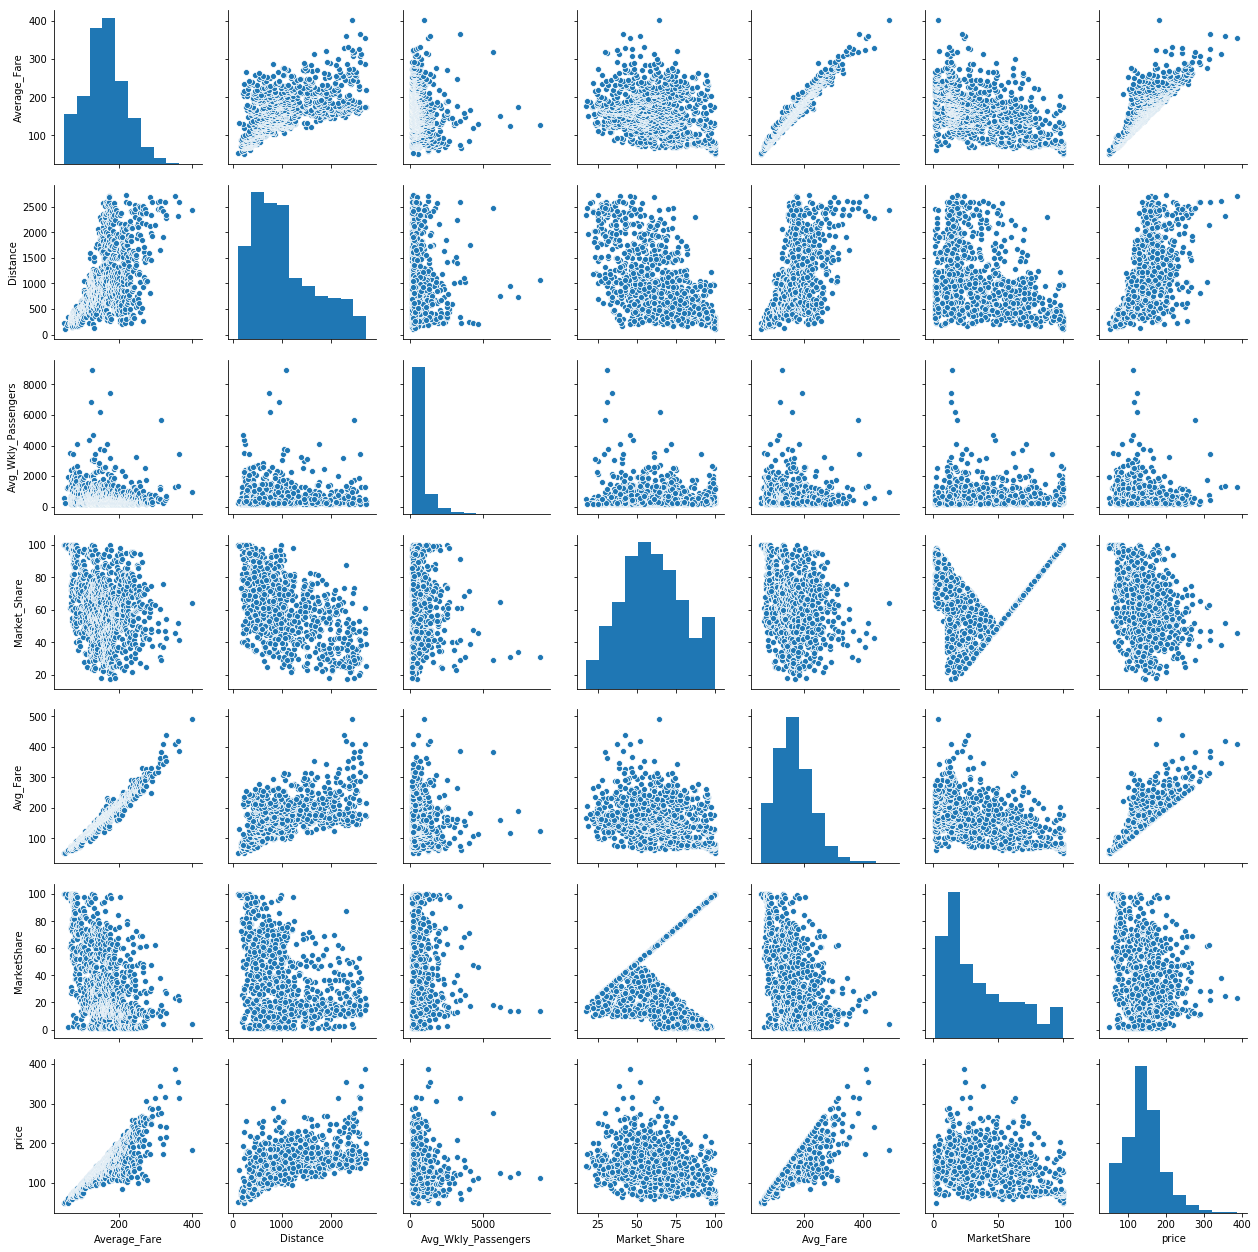

In [14]:
#plt.scatter(df_X_out, Y, s=np.pi*3,  alpha=0.5)
import seaborn as sns
sns.pairplot(df)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(df_X_out, Y, test_size=0.2, random_state=0)

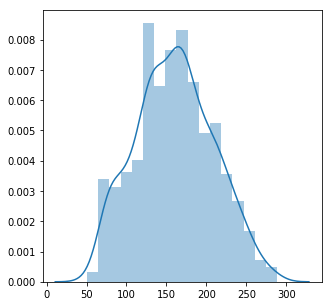

In [16]:
plt.figure(figsize=(5,5))
plt.tight_layout()
sns.distplot(Y)

In [17]:
print("shape of x train :",X_train.shape)
print("shape of x test :",X_test.shape)
print("shape of y train :",y_train.shape)
print("shape of y test :",y_test.shape)

shape of x train : (708, 9)
shape of x test : (177, 9)
shape of y train : (708, 1)
shape of y test : (177, 1)


In [18]:
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [19]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [20]:
eff_df = pd.DataFrame(regressor.coef_,columns=df_X_out.columns.array)
eff_df.transpose()

,0
City1,0.020806
City2,-0.022142
Distance,0.003160
Lead_Airline,-0.177318
Market_Share,0.075561
Avg_Fare,0.738373
LowPriceAirline,0.074877
MarketShare,-0.032374
price,0.211817


In [21]:
regressor.coef_

array([[ 0.02080574, -0.02214202,  0.00315974, -0.17731835,  0.07556115,
         0.738373  ,  0.07487745, -0.03237407,  0.21181738]])

In [22]:
regressor.intercept_

array([4.85658472])

In [23]:
#R2

In [24]:
y_pred = pd.DataFrame(regressor.predict(pd.DataFrame(X_test)))
y_pred.head()

,0
0,72.615630
1,102.830753
2,213.831576
3,221.714277
4,188.873426


In [25]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
print(mse,rmse)

50.86911940743397 7.132259067605016


In [26]:
df_test_pred=y_test
#y_test.index
#y_pred.index
df_test_pred=df_test_pred.join(y_pred,on=y_pred.index,rsuffix='predicted')
df_test_pred.head()

,Average_Fare,0
697,71.48,72.615630
641,112.46,102.830753
2,214.42,213.831576
254,210.99,221.714277
804,164.99,188.873426


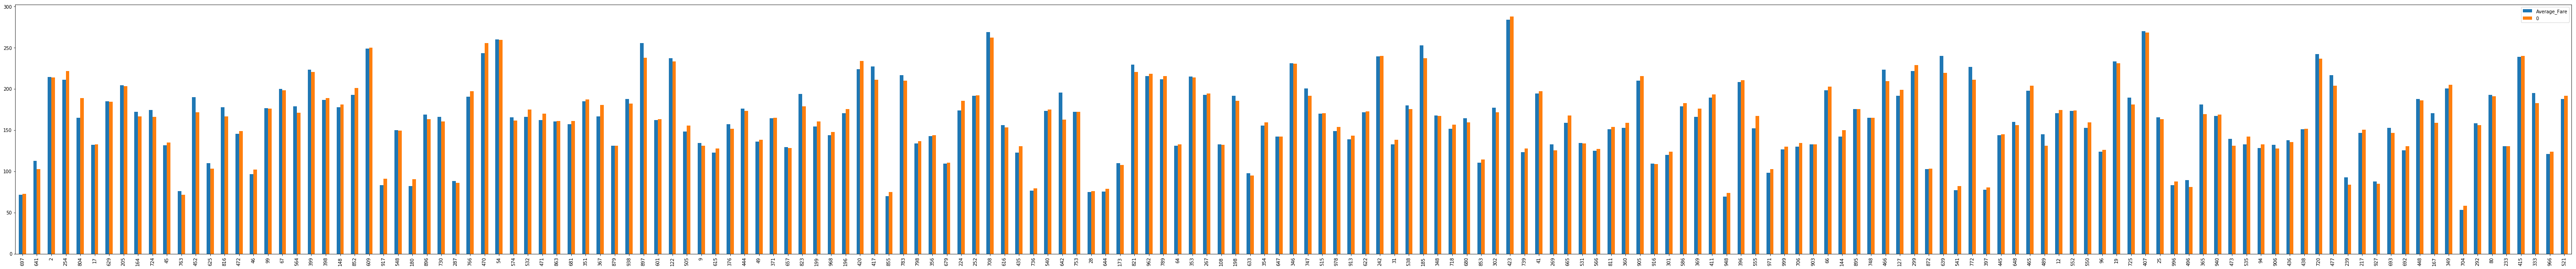

In [27]:
df_test_pred.plot(kind='bar',figsize=(100,10))

In [28]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
rmse

7.132259067605016

In [29]:
regressor.score(pd.DataFrame(X_test),pd.DataFrame(y_test))

0.9767687913455253

In [30]:
print("As the value is close to 1, the model accuracy is high")

As the value is close to 1, the model accuracy is high


In [31]:
r2_score(y_test, y_pred, sample_weight=None, multioutput="uniform_average")

0.9767687913455253